In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from mlxtend.association import apriori
from mlxtend.preprocessing import OnehotTransactions

# Pandas Printing Options
pd.set_option('display.float_format', lambda x: '%.7f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set_style('white')

# LOAD

In [2]:
injuries = pd.read_csv("../data/injuries_2013_present.csv", index_col=['DATE'], parse_dates=['DATE'])

# FILTER CONTRIBUTING FACTORS

In [3]:
contributing_factors = injuries[['CONTRIBUTING FACTOR VEHICLE 1',
                                 'CONTRIBUTING FACTOR VEHICLE 2',
                                 'CONTRIBUTING FACTOR VEHICLE 3',
                                 'CONTRIBUTING FACTOR VEHICLE 4',
                                 'CONTRIBUTING FACTOR VEHICLE 5']]

# HELPER FUNCTIONS

In [4]:
def filter_set(row):
    filtered = [element for element in row if str(element) != 'nan']
    filtered = [element for element in filtered if str(element) != 'Unspecified']
    return filtered

def my_generator(contributing_factors):
    for i in contributing_factors.as_matrix():
        if filter_set(i):
            yield filter_set(i)
            
def get_factors(dataset):
    oht = OnehotTransactions()
    oht_ary = oht.fit(dataset).transform(dataset)
    return pd.DataFrame(oht_ary, columns=oht.columns_)

# GET FACTORS

In [5]:
factors_obj = my_generator(contributing_factors)
contributing_factors_to_injuries = [fact for fact in factors_obj]
df = get_factors(contributing_factors_to_injuries)

# RUN APRIORI

In [6]:
df.shape

(19641, 47)

In [7]:
results = apriori(df, min_support=0.0001, use_colnames=True)
results['count'] = results['support'] * 19641
results.head()

,support,itemsets,length,count
0,0.0004073,[Accelerator Defective],1,8.0000000
1,0.0134922,[Aggressive Driving/Road Rage],1,265.0000000
2,0.0125757,[Alcohol Involvement],1,247.0000000
3,0.0707703,[Backing Unsafely],1,1390.0000000
4,0.0019347,[Brakes Defective],1,38.0000000


In [11]:
reasons = df.sum().sort_values(ascending=False)[:10]
reasons

Driver Inattention/Distraction    6249
Failure to Yield Right-of-Way     5704
Backing Unsafely                  1390
Passenger Distraction             1271
Other Vehicular                    693
Traffic Control Disregarded        452
Glare                              445
View Obstructed/Limited            440
Pavement Slippery                  316
Driver Inexperience                304
dtype: int64

# PLOT RESULTS

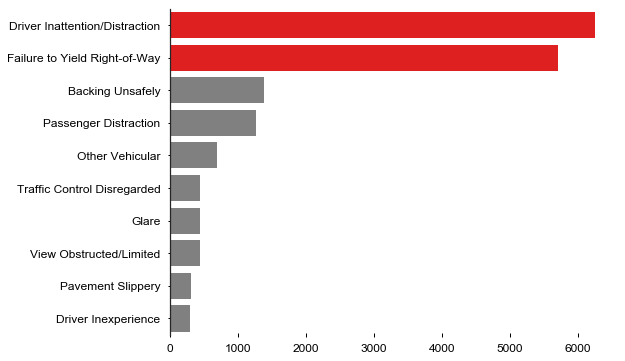

In [12]:
values = reasons.values
labels = reasons.index

plt.figure(figsize=(8, 6))
colors = ['gray' if (x < 5000) else 'red' for x in values]
sns.barplot(reasons.values, labels, palette=colors)
plt.tick_params(direction='inout', length=4, width=1, colors='black')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.despine(bottom=True)